<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Deep Learning From Scratch</h1>
<h2>Linear Regression</h2>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -i -n -v -m -g -iv

matplotlib 3.1.0
watermark  1.8.1
numpy      1.16.2
Sun Dec 08 2019 2019-12-08T19:23:12-05:00

CPython 3.7.3
IPython 6.2.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.0.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   : 1aa3ac8e019f5a80d5859a063dba4cefad42fbaf


In [3]:
plt.style.use('./d4sci.mplstyle')

# Load dataset

In [4]:
data = np.array(np.loadtxt("data/Anscombe1.dat"))

In [5]:
print(data)

[[10.    8.04]
 [ 8.    6.95]
 [13.    7.58]
 [ 9.    8.81]
 [11.    8.33]
 [14.    9.96]
 [ 6.    7.24]
 [ 4.    4.26]
 [12.   10.84]
 [ 7.    4.82]
 [ 5.    5.68]]


In [6]:
X = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

In [7]:
X

array([[10.],
       [ 8.],
       [13.],
       [ 9.],
       [11.],
       [14.],
       [ 6.],
       [ 4.],
       [12.],
       [ 7.],
       [ 5.]])

In [8]:
y

array([[ 8.04],
       [ 6.95],
       [ 7.58],
       [ 8.81],
       [ 8.33],
       [ 9.96],
       [ 7.24],
       [ 4.26],
       [10.84],
       [ 4.82],
       [ 5.68]])

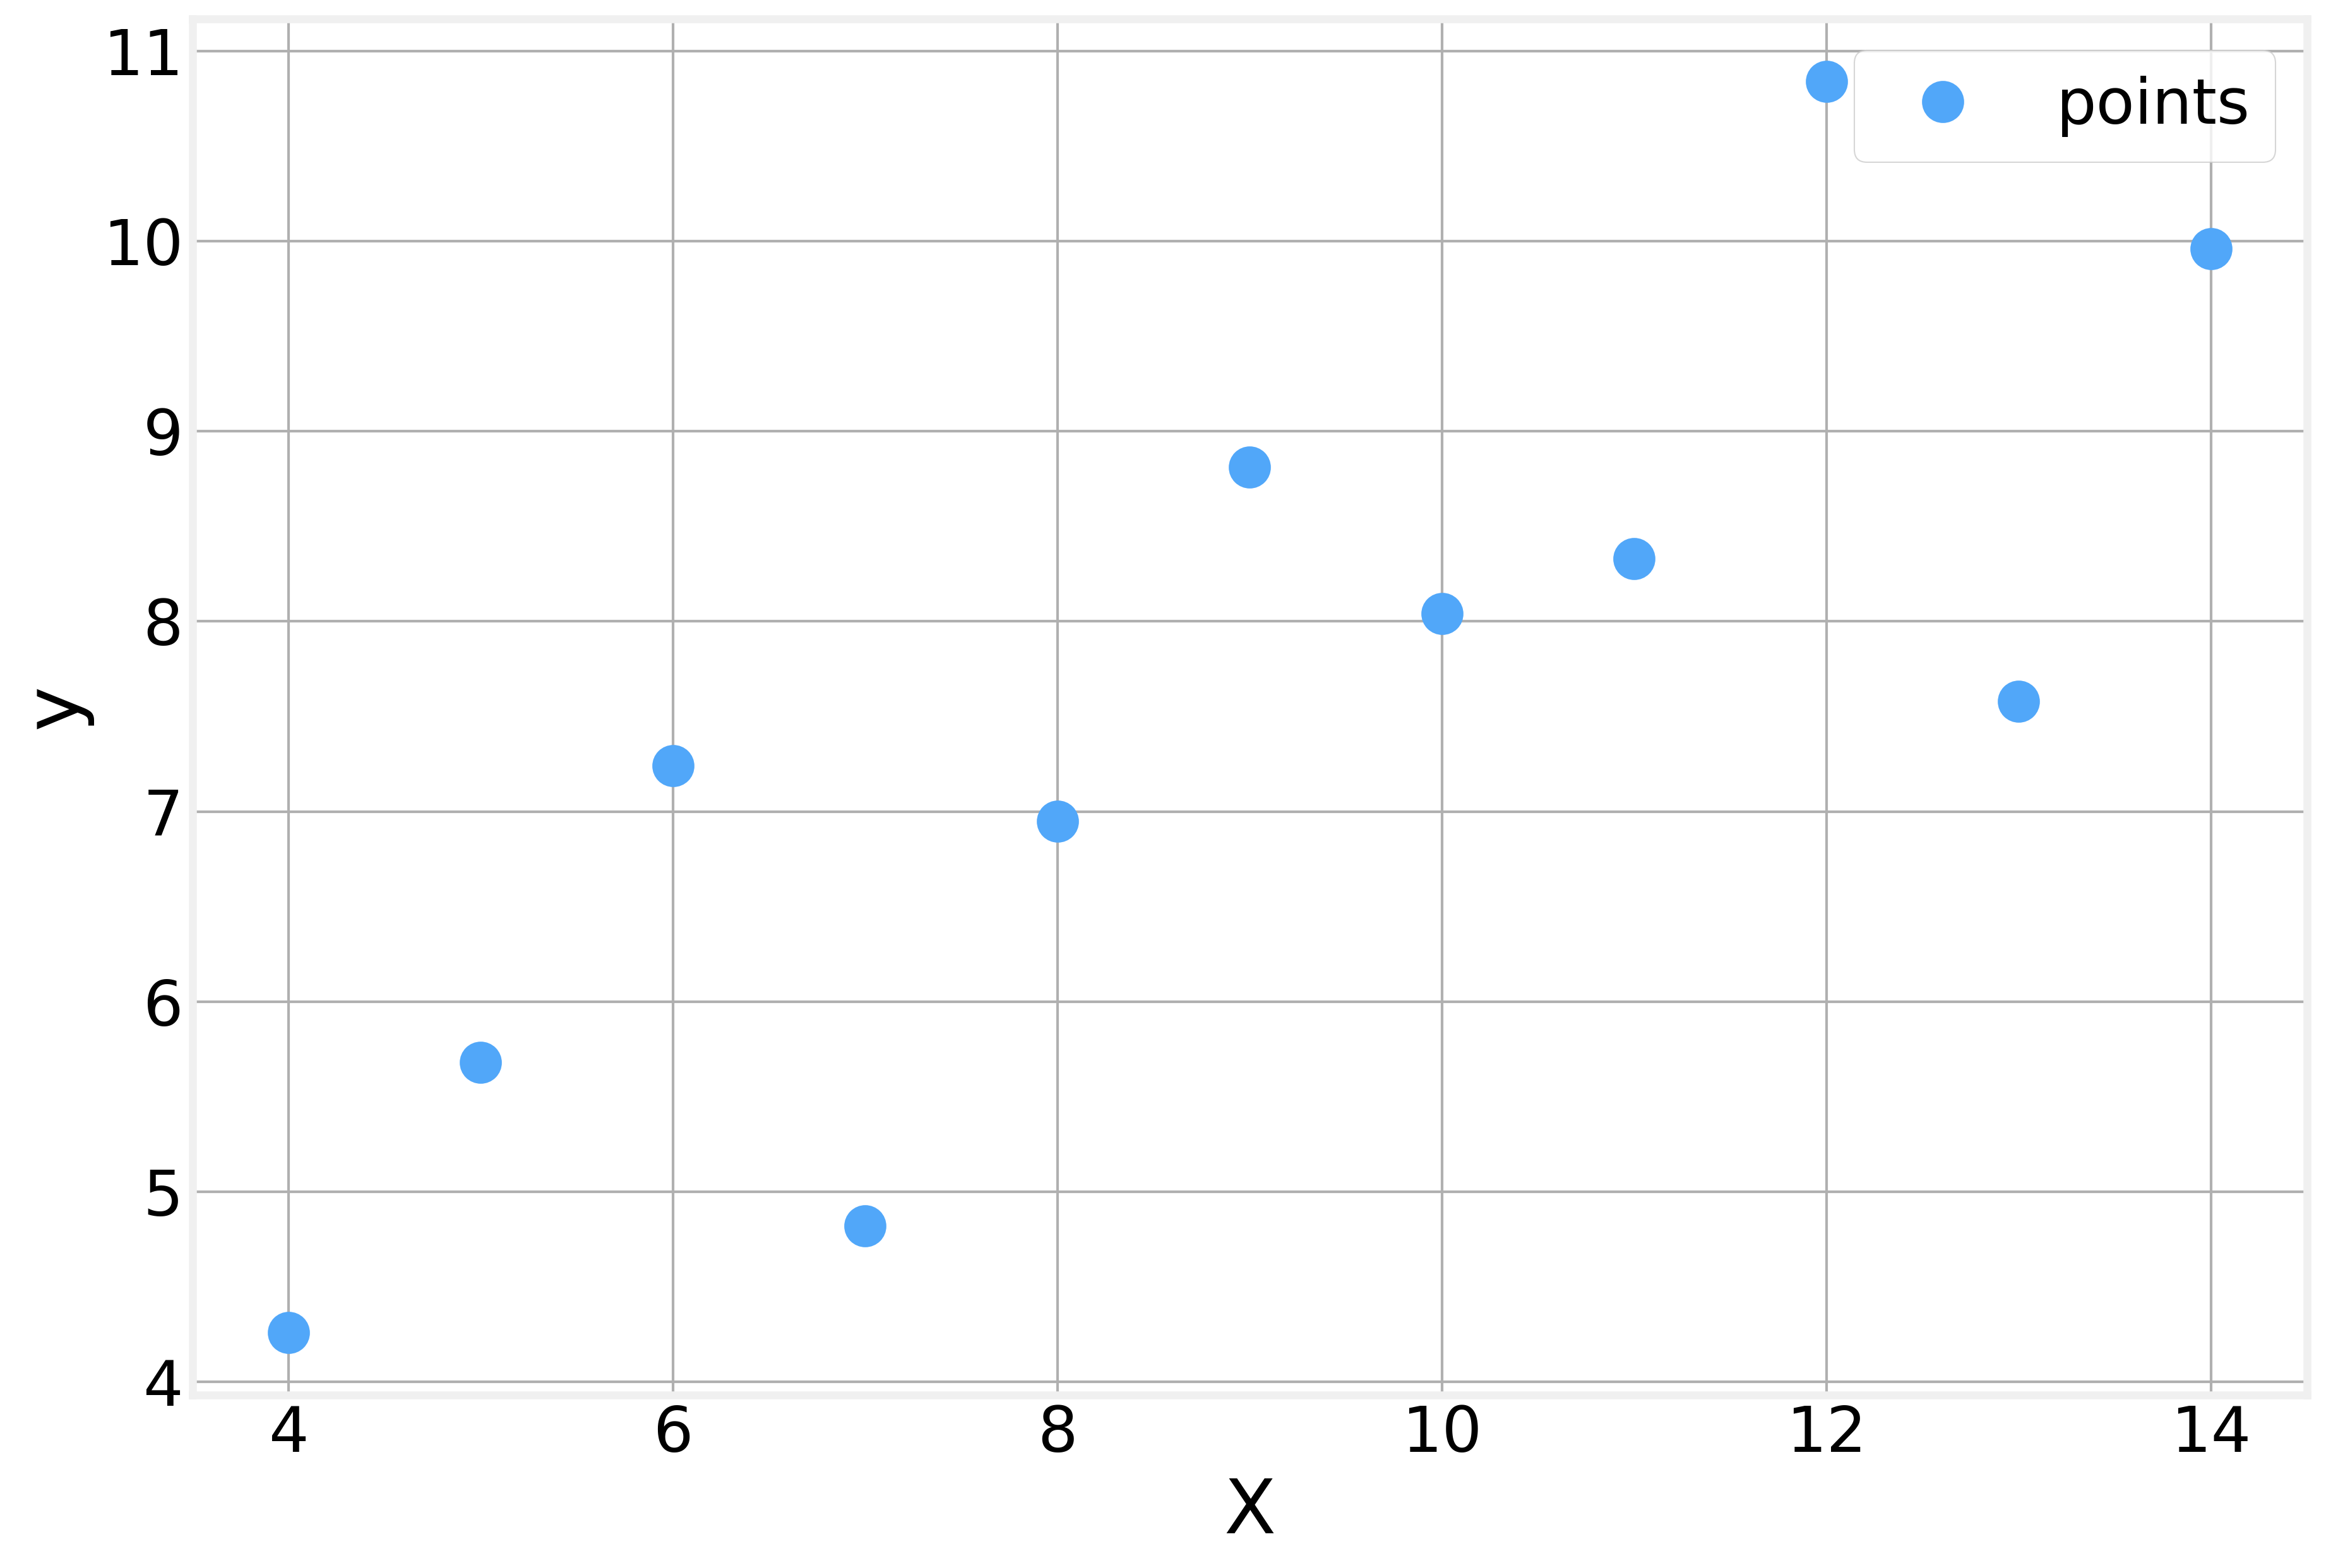

In [9]:
plt.plot(X, y, '.', markersize=30, label='points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

Get matrix dimensions and add the bias column

In [10]:
M, N = X.shape
X = np.concatenate((np.ones((M, 1)), X), axis=1) #Add x0

In [11]:
print(X)

[[ 1. 10.]
 [ 1.  8.]
 [ 1. 13.]
 [ 1.  9.]
 [ 1. 11.]
 [ 1. 14.]
 [ 1.  6.]
 [ 1.  4.]
 [ 1. 12.]
 [ 1.  7.]
 [ 1.  5.]]


Set the training parameters and initialize the weight matrix

In [12]:
alpha = 0.01
epsilon = 0.12

weights = 2*np.random.rand(N+1, 1)*epsilon - epsilon
count = 0

## Training Procedure

In [13]:
oldJ = 0
err = 1

Js = []

while err > 1e-6:
    Hs = np.dot(X, weights)
    deltas = alpha/M*np.dot(X.T, (Hs-y))

    count += 1
    weights -= deltas

    J = np.sum(np.power(Hs-y, 2.))/(2*M)
    Js.append(J)
    err = np.abs(oldJ-J)
    oldJ = J
    
    if count % 100 == 0:
        print(count, J, err, weights.flatten())

print(count, J, err, weights.flatten())

100 0.9931914834086151 0.0008014167109945403 [0.4163039  0.75593624]
200 0.9212539285109841 0.0006445895653542921 [0.68286087 0.7295419 ]
300 0.8633936460786856 0.0005184515147533819 [0.92191844 0.70587054]
400 0.8168558913842237 0.0004169970902370146 [1.13631357 0.68464123]
500 0.7794249885099411 0.0003353960174056203 [1.32859059 0.66560206]
600 0.7493188413788103 0.000269763245656085 [1.5010313  0.64852706]
700 0.7251040876464319 0.0002169739798041359 [1.65568212 0.63321361]
800 0.7056278559065885 0.0001745149076833874 [1.79437836 0.61947998]
900 0.6899628771512246 0.00014036454062948955 [1.91876597 0.60716318]
1000 0.6773633372256449 0.00011289696982119679 [2.03032111 0.59611704]
1100 0.6672293684015934 9.080445629428002e-05 [2.13036763 0.58621049]
1200 0.6590784895017736 7.303516910983632e-05 [2.22009283 0.57732594]
1300 0.6525226348318981 5.874310738274158e-05 [2.30056151 0.56935797]
1400 0.6472496782611075 4.724782193343824e-05 [2.37272862 0.56221202]
1500 0.6430085728068932 3.80

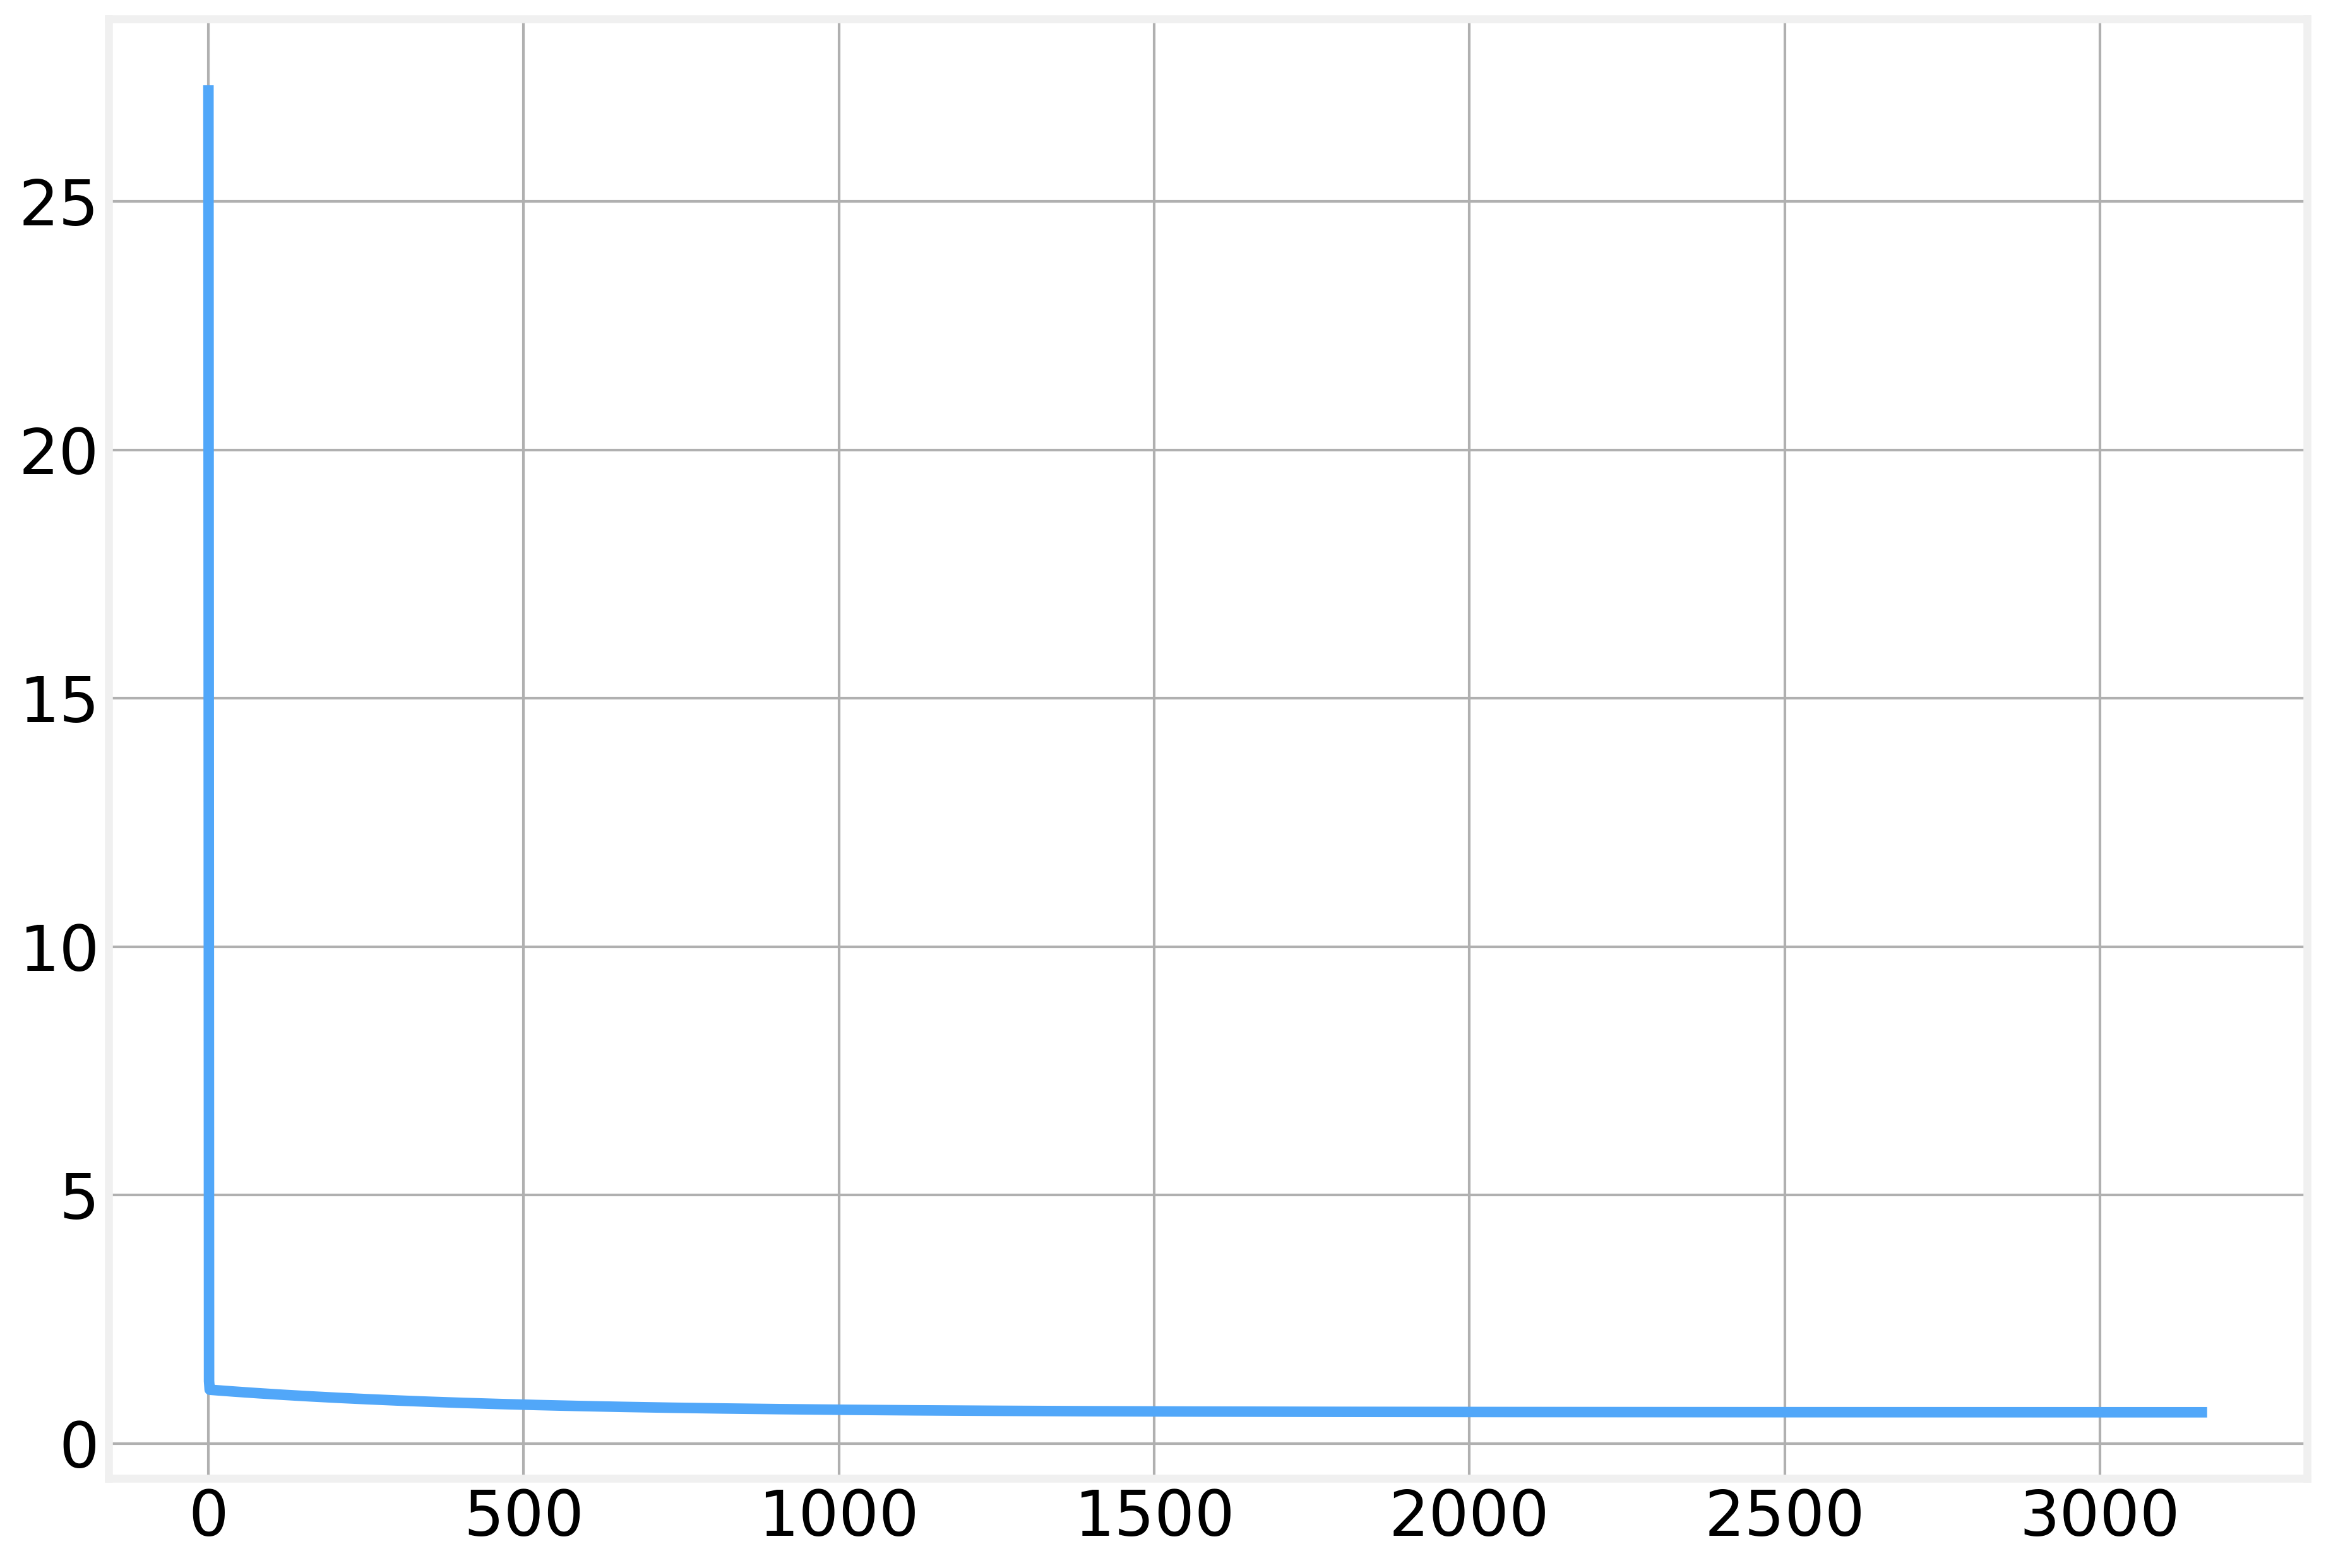

In [14]:
plt.plot(Js)

In [15]:
weights.flatten()

array([2.90887813, 0.50912275])

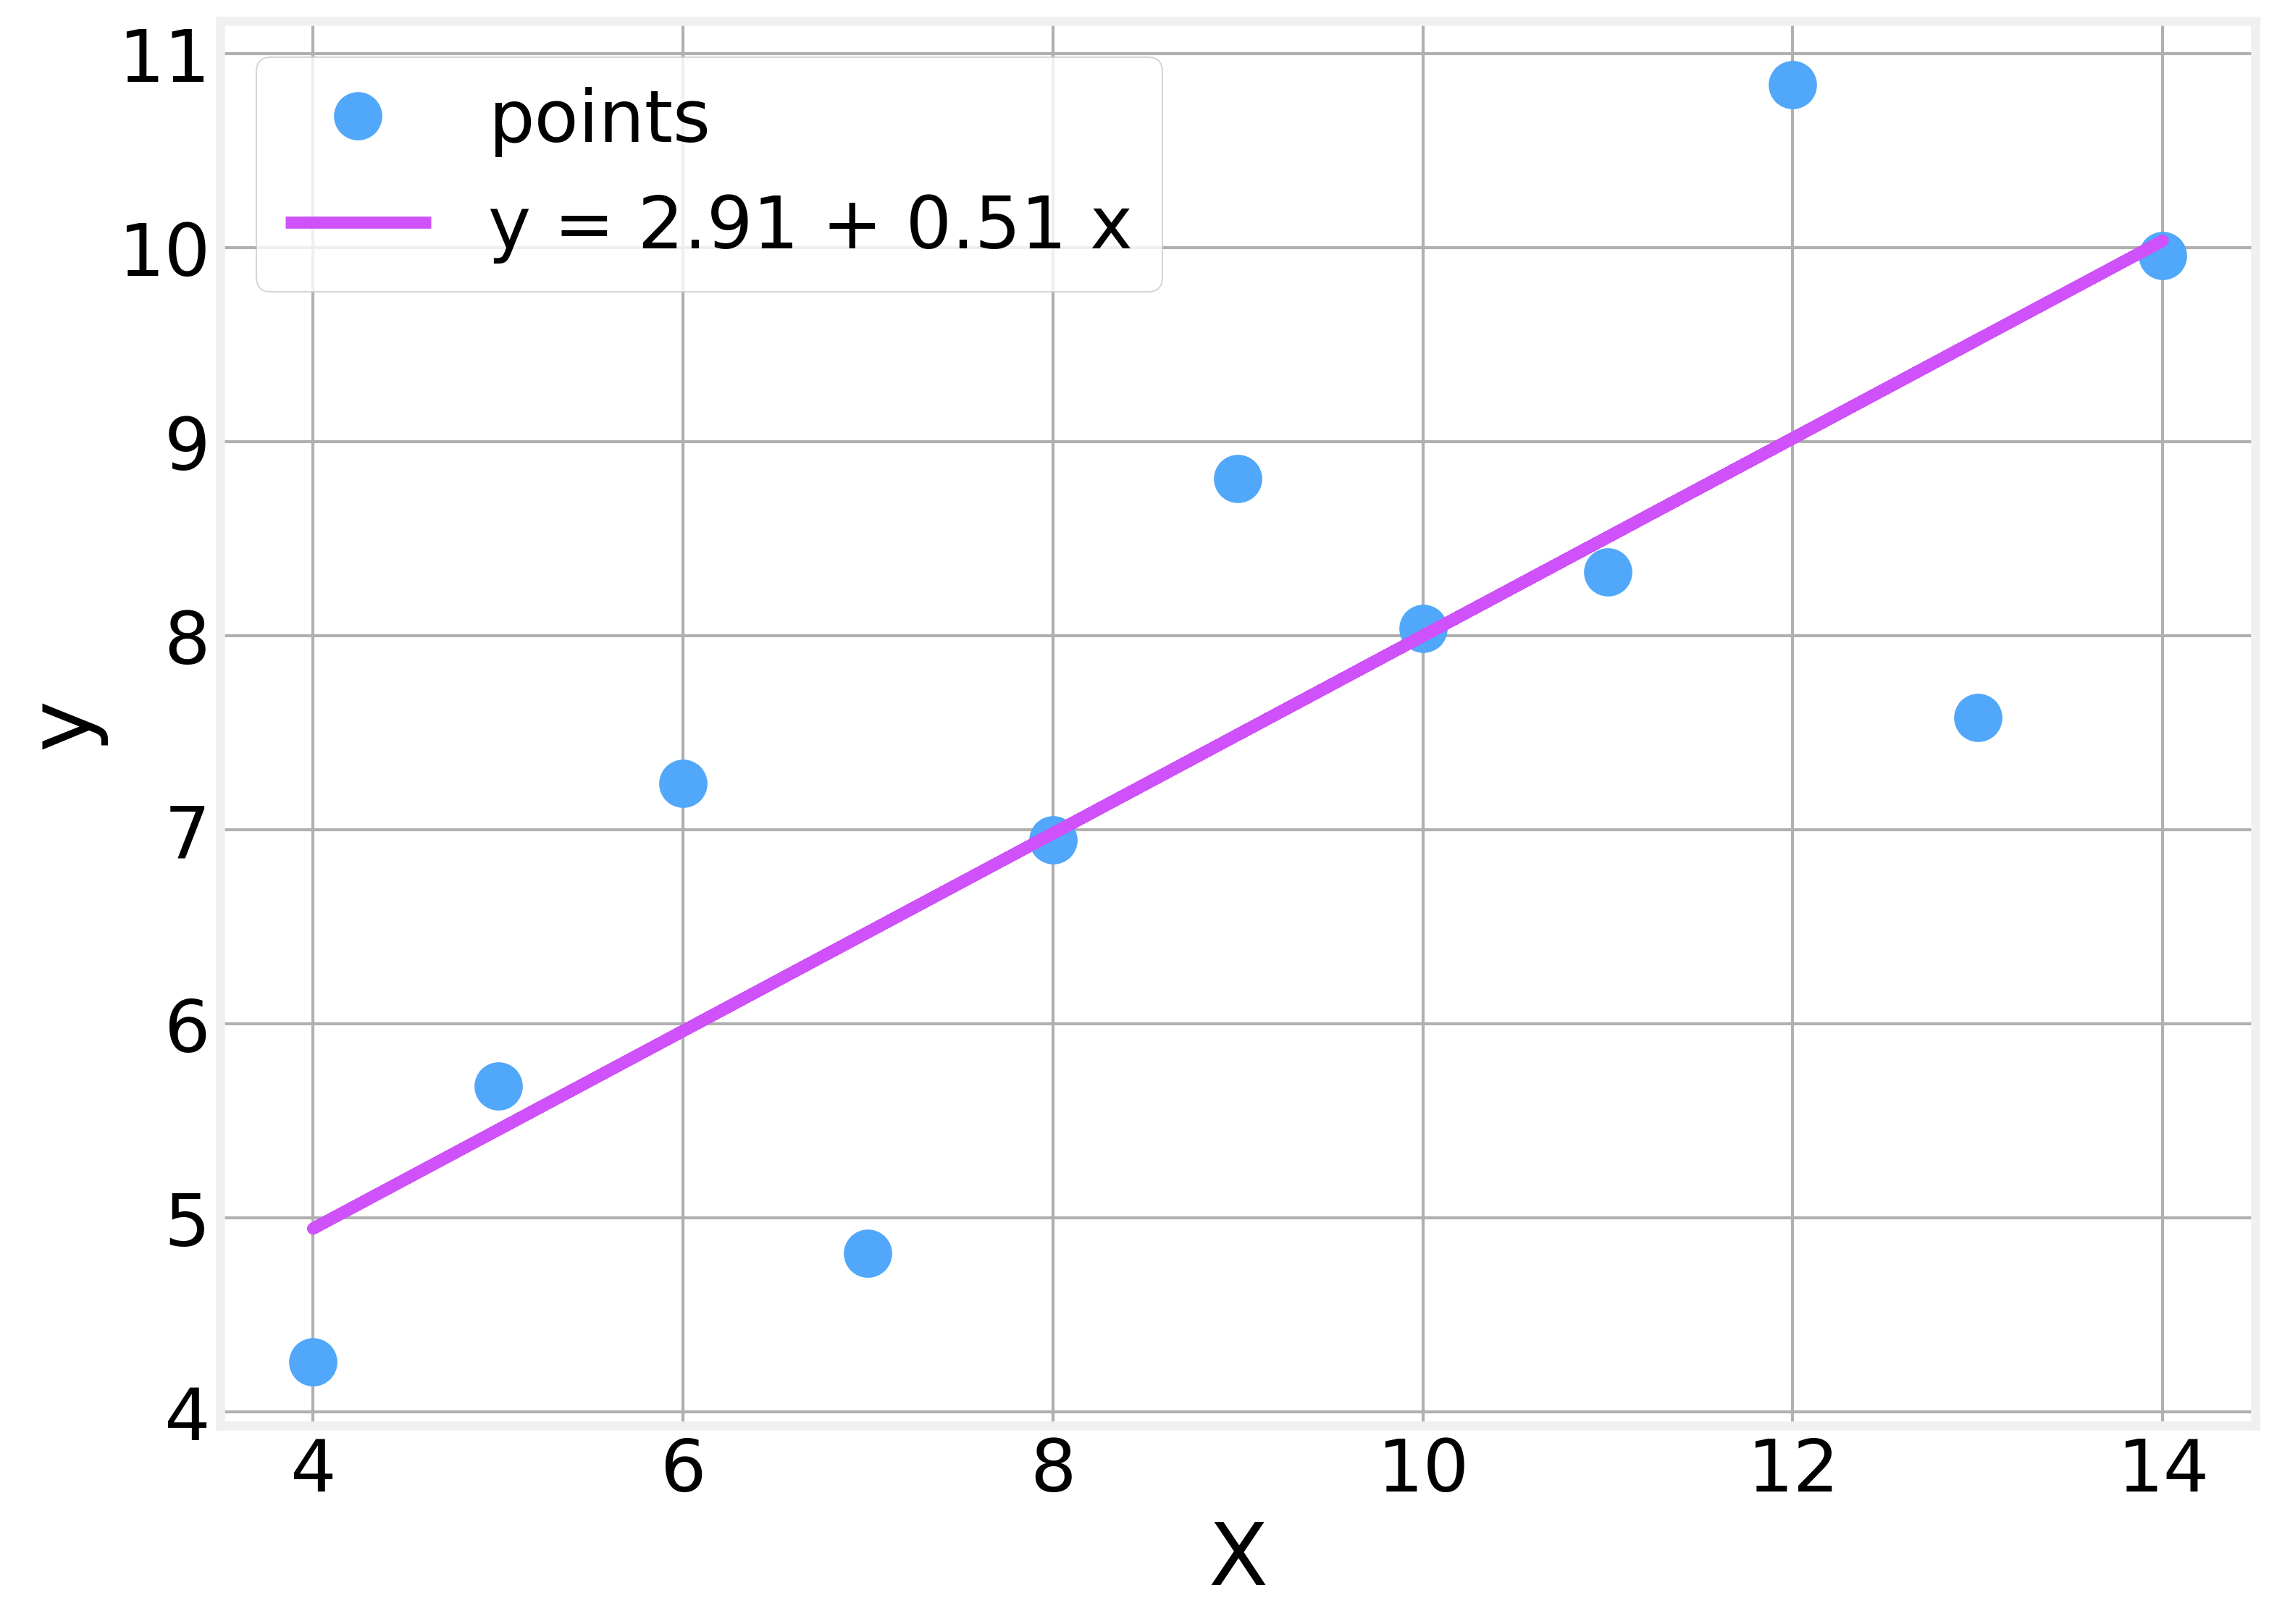

In [16]:
plt.plot(X.T[1], y, '.', markersize=30, label='points')
plt.plot(X.T[1], np.dot(X, weights.flatten()), '-',\
         label='y = %2.2f + %2.2f x' % tuple(weights.flatten()))
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.gcf().set_size_inches(11, 8)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>